In [ ]:
%matplotlib inline


# Fit with Data in a pandas DataFrame

Simple example demonstrating how to read in the data using ``pandas`` and
supply the elements of the ``DataFrame`` to lmfit.


In [2]:
import pandas as pd

from lmfit.models import LorentzianModel

read the data into a pandas DataFrame, and use the ``x`` and ``y`` columns:



In [3]:
dframe = pd.read_csv('nvdi_2019.csv')

In [13]:
dframe["interval_to"] = pd.to_datetime(dframe["interval_to"])

In [23]:
dframe["interval_from"].last

<bound method NDFrame.last of 0    2019-01-18
1    2019-01-21
2    2019-02-12
3    2019-02-15
4    2019-02-20
5    2019-02-25
6    2019-02-27
7    2019-03-07
8    2019-03-19
9    2019-03-22
10   2019-03-29
11   2019-04-01
12   2019-04-08
13   2019-04-16
14   2019-04-18
15   2019-04-21
16   2019-05-11
17   2019-05-13
18   2019-06-15
19   2019-06-22
20   2019-06-30
21   2019-07-05
22   2019-07-17
23   2019-07-25
24   2019-07-30
25   2019-08-24
26   2019-08-26
27   2019-08-31
28   2019-09-13
29   2019-09-20
30   2019-10-28
31   2019-10-30
32   2019-11-14
33   2019-11-17
34   2019-11-19
35   2019-11-29
36   2019-12-02
37   2019-12-04
38   2019-12-09
39   2019-12-12
40   2019-12-14
41   2019-12-27
Name: interval_from, dtype: datetime64[ns]>

In [10]:

model = LorentzianModel()
params = model.guess(dframe['indices_NDVI_mean'], x=dframe.index)

result = model.fit(dframe['indices_NDVI_mean'], params, x=dframe.index)

and gives the fitting results:



and plot below:



In [4]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

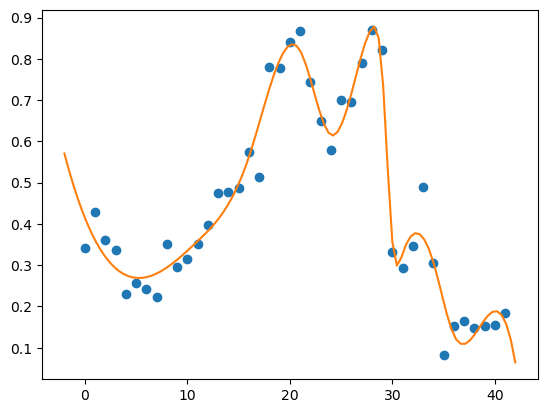

In [34]:
x = dframe.index
y = dframe["indices_NDVI_mean"]

s = UnivariateSpline(x, y, s=0.1)
xs = np.linspace(-2, len(x), 100)
ys = s(xs)

plt.plot(x, y, 'o')
plt.plot(xs, ys)
plt.show()

In [24]:
s(-1)

array(-0.22458722)